For Binary Classification

In [213]:
############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, mutual_info_regression, mutual_info_classif, chi2
from time import time

In [214]:
df = pd.read_csv('cancer.csv')

In [215]:
df.head(100)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,M
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,M
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,M
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,M
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,M
96,86211,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,B
97,862261,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,B
98,862485,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,B


In [216]:

# FEATURES FROM RIDGECV + SELECTFROMMODEL METHOD
df = df[['compactness_mean','concave points_mean','smoothness_se','concavity_se','concave points_se','fractal_dimension_se','fractal_dimension_worst','diagnosis']]    
# FEATURES FROM RIDGECV METHOD
#df = df[['compactness_mean','smoothness_se','concave points_se','fractal_dimension_se','fractal_dimension_worst','concavity_se','diagnosis']]

In [217]:
df.head(10)

,compactness_mean,concave points_mean,smoothness_se,concavity_se,concave points_se,fractal_dimension_se,fractal_dimension_worst,diagnosis
0,0.27760,0.14710,0.006399,0.05373,0.01587,0.006193,0.11890,M
1,0.07864,0.07017,0.005225,0.01860,0.01340,0.003532,0.08902,M
2,0.15990,0.12790,0.006150,0.03832,0.02058,0.004571,0.08758,M
3,0.28390,0.10520,0.009110,0.05661,0.01867,0.009208,0.17300,M
4,0.13280,0.10430,0.011490,0.05688,0.01885,0.005115,0.07678,M
5,0.17000,0.08089,0.007510,0.03672,0.01137,0.005082,0.12440,M
6,0.10900,0.07400,0.004314,0.02254,0.01039,0.002179,0.08368,M
7,0.16450,0.05985,0.008805,0.02488,0.01448,0.005412,0.11510,M
8,0.19320,0.09353,0.005731,0.03553,0.01226,0.003749,0.10720,M
9,0.23960,0.08543,0.007149,0.07743,0.01432,0.010080,0.20750,M


In [218]:
np.array(df.columns)

array(['compactness_mean', 'concave points_mean', 'smoothness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'fractal_dimension_worst', 'diagnosis'], dtype=object)

<AxesSubplot:>

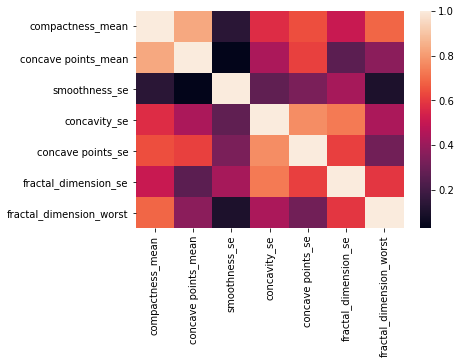

In [219]:
sns.heatmap(df.corr())

In [220]:
df['diagnosis'].replace(['M','B'], [1,0], inplace = True)
df.head(100)

,compactness_mean,concave points_mean,smoothness_se,concavity_se,concave points_se,fractal_dimension_se,fractal_dimension_worst,diagnosis
0,0.27760,0.147100,0.006399,0.053730,0.015870,0.006193,0.11890,1
1,0.07864,0.070170,0.005225,0.018600,0.013400,0.003532,0.08902,1
2,0.15990,0.127900,0.006150,0.038320,0.020580,0.004571,0.08758,1
3,0.28390,0.105200,0.009110,0.056610,0.018670,0.009208,0.17300,1
4,0.13280,0.104300,0.011490,0.056880,0.018850,0.005115,0.07678,1
...,...,...,...,...,...,...,...,...
95,0.13130,0.086830,0.006016,0.042320,0.012690,0.004411,0.08368,1
96,0.07057,0.029410,0.005433,0.011310,0.015190,0.003408,0.07376,0
97,0.05301,0.007937,0.011130,0.005308,0.005250,0.005667,0.08988,0
98,0.07525,0.033500,0.006153,0.016930,0.006884,0.002551,0.08756,0


In [221]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [222]:
#Y = df.iloc[:, 1].values
Y =  df["diagnosis"].values
print(Y.shape)
print(type(Y))
#print(Y)

(569,)
<class 'numpy.ndarray'>


In [223]:
df = df.drop(["diagnosis"], axis=1)

X = df.values
print(X.shape)
print(type(X))
print(X)

(569, 7)
<class 'numpy.ndarray'>
[[0.2776   0.1471   0.006399 ... 0.01587  0.006193 0.1189  ]
 [0.07864  0.07017  0.005225 ... 0.0134   0.003532 0.08902 ]
 [0.1599   0.1279   0.00615  ... 0.02058  0.004571 0.08758 ]
 ...
 [0.1023   0.05302  0.005903 ... 0.01557  0.003892 0.0782  ]
 [0.277    0.152    0.006522 ... 0.01664  0.006185 0.124   ]
 [0.04362  0.       0.007189 ... 0.       0.002783 0.07039 ]]


In [224]:
# #CHECKING THE FEATURE IMPORTANCE USING THE SELECTKBEST ALSO KNOWN AS CHI2

X_new = SelectKBest(chi2, k=7).fit_transform(X, Y)
print(X_new.shape)

# #CHECKING THE FEATURE IMPORTANCE USING THE RIDGECV + SELECTFROMMODEL
# ridge = RidgeCV(alphas=np.logspace(-10, 10, num=5)).fit(X, Y)
# importance = np.abs(ridge.coef_)
# feature_names = np.array(df.columns)

# threshold = np.sort(importance)[-8] + 0.01

# tic = time()
# sfm = SelectFromModel(ridge, threshold=threshold).fit(X, Y)
# toc = time()
# print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
# print(f"Done in {toc - tic:.3f}s")


(569, 7)


In [225]:
print(X_new)

[[0.2776   0.1471   0.006399 ... 0.01587  0.006193 0.1189  ]
 [0.07864  0.07017  0.005225 ... 0.0134   0.003532 0.08902 ]
 [0.1599   0.1279   0.00615  ... 0.02058  0.004571 0.08758 ]
 ...
 [0.1023   0.05302  0.005903 ... 0.01557  0.003892 0.0782  ]
 [0.277    0.152    0.006522 ... 0.01664  0.006185 0.124   ]
 [0.04362  0.       0.007189 ... 0.       0.002783 0.07039 ]]


In [226]:
Y_new = Y
print(Y_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [227]:
# IMP = pd.DataFrame(importance) 
# #print(IMP)
# FEATNAMES =  pd.DataFrame(feature_names)
# #print(FEATNAMES)
# frames = [IMP, FEATNAMES]
# result = pd.concat([IMP, FEATNAMES], axis=1)
# (result)

# CONSIDERING FEATURES FROM RIDGECV
# - compactness_mean
# - smoothness_se
# - concave points_se
# - fractal_dimension_se
# - fractal_dimension_worst
# - concavity_se

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size=0.2, random_state=42)

In [229]:
X_train[0:5]

array([[0.1413  , 0.04375 , 0.009549, 0.3038  , 0.03322 , 0.009559,
        0.1175  ],
       [0.2832  , 0.1496  , 0.004253, 0.03872 , 0.01567 , 0.005295,
        0.1284  ],
       [0.08751 , 0.0218  , 0.008738, 0.04312 , 0.0156  , 0.005822,
        0.0849  ],
       [0.07234 , 0.01615 , 0.007189, 0.01081 , 0.006245, 0.002619,
        0.08147 ],
       [0.08061 , 0.0129  , 0.007514, 0.007665, 0.008193, 0.005953,
        0.0802  ]])

In [230]:
X_test[0:5]

array([[0.1058  , 0.03821 , 0.006953, 0.02701 , 0.01037 , 0.003586,
        0.0875  ],
       [0.1029  , 0.07951 , 0.004444, 0.02269 , 0.0137  , 0.001698,
        0.06589 ],
       [0.1223  , 0.08087 , 0.00624 , 0.02813 , 0.01093 , 0.002461,
        0.08019 ],
       [0.1316  , 0.02799 , 0.01    , 0.04861 , 0.01167 , 0.006005,
        0.09359 ],
       [0.112   , 0.02594 , 0.01215 , 0.05553 , 0.01494 , 0.005512,
        0.08134 ]])

In [231]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 4.16058881e-02, -2.64868656e-01, -1.18143232e-02,
        -1.81053500e-01, -2.42388306e-01, -8.42132958e-02,
         2.03729954e-01],
       [-1.37241019e-02,  8.21448757e-01, -8.33501438e-01,
        -3.15589998e-01,  2.87260309e-01, -7.62357471e-01,
        -1.00838949e+00],
       [ 3.56414451e-01,  8.57220952e-01, -2.45318872e-01,
        -1.46173667e-01, -1.53318269e-01, -4.88298146e-01,
        -2.06292866e-01],
       [ 5.33852005e-01, -5.33686185e-01,  9.86065565e-01,
         4.91628995e-01, -3.56185766e-02,  7.84658928e-01,
         5.45322153e-01],
       [ 1.59897591e-01, -5.87607509e-01,  1.69018167e+00,
         7.07136535e-01,  4.84486820e-01,  6.07579967e-01,
        -1.41788592e-01],
       [ 3.30798322e+00,  2.72815939e+00, -1.52965039e-01,
         1.19420849e+00,  7.54878005e-01,  8.49312504e-01,
         2.25103952e+00],
       [ 1.75111178e+00,  2.67818353e+00, -9.86114509e-01,
         9.14451962e-02,  4.47904484e-01, -8.78412376e-03,
         1.0501036

In [232]:
X_train[0:5]

array([[0.1413  , 0.04375 , 0.009549, 0.3038  , 0.03322 , 0.009559,
        0.1175  ],
       [0.2832  , 0.1496  , 0.004253, 0.03872 , 0.01567 , 0.005295,
        0.1284  ],
       [0.08751 , 0.0218  , 0.008738, 0.04312 , 0.0156  , 0.005822,
        0.0849  ],
       [0.07234 , 0.01615 , 0.007189, 0.01081 , 0.006245, 0.002619,
        0.08147 ],
       [0.08061 , 0.0129  , 0.007514, 0.007665, 0.008193, 0.005953,
        0.0802  ]])

In [233]:
X_test[0:5]

array([[0.1058  , 0.03821 , 0.006953, 0.02701 , 0.01037 , 0.003586,
        0.0875  ],
       [0.1029  , 0.07951 , 0.004444, 0.02269 , 0.0137  , 0.001698,
        0.06589 ],
       [0.1223  , 0.08087 , 0.00624 , 0.02813 , 0.01093 , 0.002461,
        0.08019 ],
       [0.1316  , 0.02799 , 0.01    , 0.04861 , 0.01167 , 0.006005,
        0.09359 ],
       [0.112   , 0.02594 , 0.01215 , 0.05553 , 0.01494 , 0.005512,
        0.08134 ]])

In [234]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

(455, 7)
(114, 7)
(455,)
(114,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [235]:
X_train
#type(X_train)

array([[0.1413  , 0.04375 , 0.009549, ..., 0.03322 , 0.009559, 0.1175  ],
       [0.2832  , 0.1496  , 0.004253, ..., 0.01567 , 0.005295, 0.1284  ],
       [0.08751 , 0.0218  , 0.008738, ..., 0.0156  , 0.005822, 0.0849  ],
       ...,
       [0.02675 , 0.00625 , 0.003492, ..., 0.003608, 0.001381, 0.0612  ],
       [0.1133  , 0.06463 , 0.005314, ..., 0.009567, 0.002846, 0.1055  ],
       [0.04038 , 0.0177  , 0.00508 , ..., 0.006797, 0.001532, 0.06878 ]])

In [236]:
Y_train
#type(Y_train)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [237]:
X_test[0]

array([0.1058  , 0.03821 , 0.006953, 0.02701 , 0.01037 , 0.003586,
       0.0875  ])

In [238]:
knnCls = RadiusNeighborsClassifier(radius=10.0,p=2, weights='uniform')

In [239]:
knnCls.fit(X_train,Y_train)

RadiusNeighborsClassifier(radius=10.0)

In [240]:
Y_Pred_TEST = knnCls.predict(X_test)
print(Y_Pred_TEST)
Y_Pred_TRAIN = knnCls.predict(X_train)
#sc =  knnCls.score(Y_test,Y_Pred_TEST)
#print(sc)
#sc2 = knnCls.score(Y_train,Y_Pred_TRAIN)
#print(sc2)

# print(" ACCURACY SCORE FOR TEST DATA : ",lrRegression.score(Y_test, Y_Pred_TEST))
# print(" ACCURACY SCORE FOR TRAIN DATA : ",lrRegression.score(Y_train, Y_Pred_TRAIN))
#Y_Pred = lrRegression.predict(X_test[0].reshape(1,-1))

# for one value prediction
#print(lrRegression.predict(X_test[0].reshape(1,-1)))

# for multiple value prediction
#print(lrRegression.predict(X_test[0:10]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [241]:
result = confusion_matrix(Y_test, Y_Pred_TEST)
print("TEST DATA  Confusion Matrix:")
print(result)

TEST DATA  Confusion Matrix:
[[71  0]
 [43  0]]


In [242]:
result = confusion_matrix(Y_train, Y_Pred_TRAIN)
print("TRAIN DATA  Confusion Matrix:")
print(result)

TRAIN DATA  Confusion Matrix:
[[286   0]
 [169   0]]


In [206]:
print(Y_Pred_TEST.shape)
print(Y_Pred_TRAIN.shape)

(114,)
(455,)


In [207]:
acc =  accuracy_score(Y_test, Y_Pred_TEST)
acc2 = accuracy_score(Y_train, Y_Pred_TRAIN)
print("TEST DATA PRedict : ", acc)
print("TRAIN DATA PRedict : ",acc2)

TEST DATA PRedict :  0.6228070175438597
TRAIN DATA PRedict :  0.6285714285714286


----------------------------------------------------------------------------------------------------------
FROM STEP SELECTKBEST WHEN k = 7 AND K VALUE FOR NEOGHBORS NEAIGBOR = 4
TEST DATA PRedict :  0.9473684210526315
TRAIN DATA PRedict :  0.9274725274725275
----------------------------------------------------------------------------------------------------------

In [72]:
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
cm = confusion_matrix(Y_test, Y_Pred_TEST)
cm

array([[71,  0],
       [ 6, 37]])

In [73]:
classreport=  classification_report(Y_test, Y_Pred_TEST)
print(classreport)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



PREVIOUS REPORT FROM SELECTKBEST 
 precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


In [74]:
classreport2 =  classification_report(Y_train, Y_Pred_TRAIN)
print(classreport2)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       286
           1       0.97      0.83      0.90       169

    accuracy                           0.93       455
   macro avg       0.94      0.91      0.92       455
weighted avg       0.93      0.93      0.93       455



PREVIOUS REPORT FROM SELECTKBEST
 precision    recall  f1-score   support

           0       0.94      0.96      0.95       286
           1       0.93      0.89      0.91       169

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455

In [76]:
# SCORE ACCURACY FOR TEST DATA
score = knnCls.score(X_test, Y_test)
score

0.9473684210526315

In [77]:
# SCORE ACCURACY FOR TRAIN DATA
score = knnCls.score(X_train, Y_train)
score

0.9274725274725275

TEST DATA prev 1 accuracy 
0.9824561403508771

Text(0.5, 1.0, 'Accuracy Score: 0.9274725274725275')

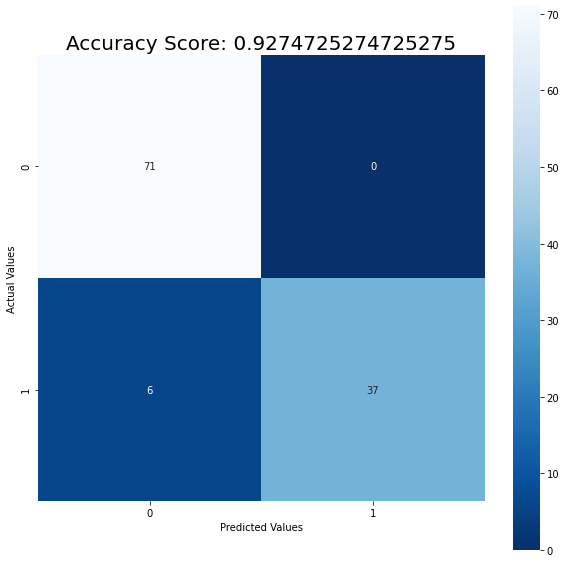

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues_r', square=True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
all_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_title,  size=20)

In [82]:
knnCls.classes_

array([0, 1])

In [87]:
# MSE FOR TEST PREDICTION
mse = mean_squared_error(Y_test, Y_Pred_TEST) 
mse

0.05263157894736842

In [88]:
# MSE FOR TRAIN PREDICTION
mse = mean_squared_error(Y_train, Y_Pred_TRAIN) 
mse

0.07252747252747253